# 1. Dataset Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

 Number of Instances: 306 <br>
 Number of Attributes: 4 (including the class attribute)<br>
 Attribute Information:<br>
 Age of patient at time of operation (numerical)<br>
 Patient's year of operation (year - 1900, numerical)<br>
 Number of positive axillary nodes detected (numerical)<br>
 Survival status (class attribute)<br>
 > 1 = the patient survived 5 years or longer<br>
 2 = the patient died within 5 year<br>

# 2. Importing necessary library
### Pandas - to read .csv file
### Seaborn and Matlab - to plot various kinds of data
### Numpy - to calculate cumulative distribution function

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 

warnings.filterwarnings("ignore") 
#reading the csv file
df = pd.read_csv('haberman.csv')

# 3. High level statistics of the dataset

In [2]:
df.shape  #print the number of rows and colums

(306, 4)

In [3]:
df.head()#Prints the first 5 entries of df

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
df.columns #printing the columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [5]:
print(df.info()) #info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


In [6]:
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.99],include='all') #describes the dataset

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
90%,67.000000,67.000000,13.000000,2.000000
99%,75.950000,69.000000,29.900000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# Observation:
1. The given data has a total of 306 rows and 4 columns
2. The column names are 'age', 'year', 'nodes', 'status'
3. The given dataset has no empty values
4. After seeing the description and evaluating the data, the status column has only 2 values (1 or 2). This is a categorical feature.

# 4. OBJECTIVE:
### The new value must be categorised as a survivor or not after 5 years of the operation

# 5. Data preprocessing

In [7]:
df['status'] = df['status'].map({1:'Yes', 2:'No'})
df.head() 
#mapping the values of 1 and 2 to yes and no respectively and #printing the first 5 records from the dataset.

,age,year,nodes,status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [8]:
df["status"].value_counts() #gives each count of the status type

Yes    225
No      81
Name: status, dtype: int64

In [9]:
(df[['age','year','nodes']] == 0).all() #return True if all values are 0 otherwise it will return false

age      False
year     False
nodes    False
dtype: bool

In [10]:
survived = df[df['status']=='Yes']
survived.describe()
#survived dataframe stores all the records where status is yes

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [11]:
not_survived = df[df['status']=='No']
not_survived.describe()
#not_survived dataframe stores all the records where status is no

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


# Observation
1. The categorical data has been changed from integer (1 & 2) to object (Yes & No)
2. The given dataset had 225 Yes and 81 No as status type which is considered as an unbalanced dataset.

# 6. Univaraite analysis

## 6a. Probability Density Function (PDF)

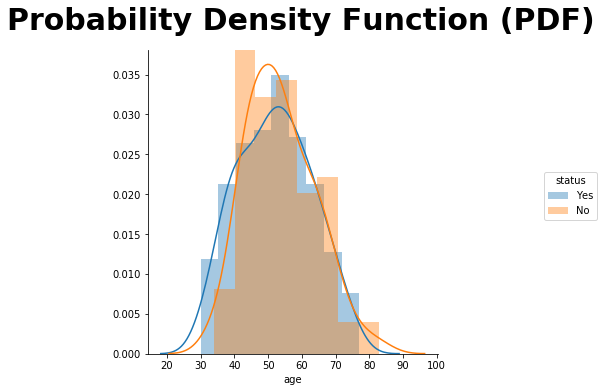

In [12]:
sns.FacetGrid(df,hue='status',size = 5, margin_titles=True)\
    .map(sns.distplot,"age")\
    .add_legend()\
    .fig.suptitle("Probability Density Function (PDF)",fontweight ="bold",fontsize='30',y=1.08)

plt.show()

# OBSERVATION:
1. The survival chance is high when people who age is in range 30-40
2. People whose age is in the range 40-60 have higher chance of not surviving.
3. People whose age is in the range 60–75 have equal chances of surviving and not surviving.
4. Overall. we cannot separate the data based on the age alone.

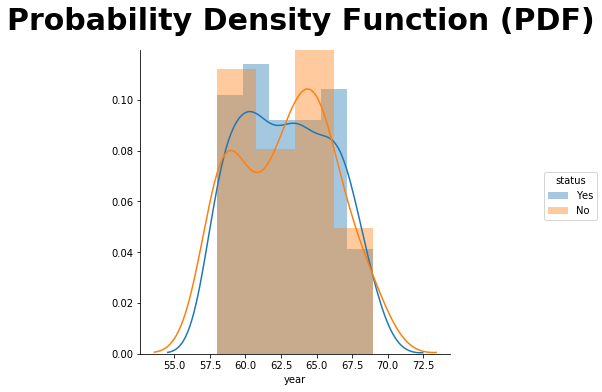

In [13]:
sns.FacetGrid(df,hue='status',size = 5)\
    .map(sns.distplot,"year")\
    . add_legend()\
    .fig.suptitle("Probability Density Function (PDF)",fontweight ="bold",fontsize='30',y=1.08);
plt.show()

# Observation
1. From 1958 to 1960, the operated patients survival rate is higher.
2. From 1960 to 1965, the operated patients not survived is high.
3. Overall, this plot gets overlapped

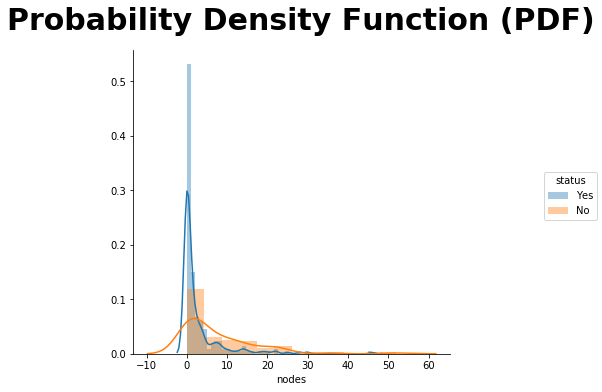

In [14]:
sns.FacetGrid(df,hue='status',size = 5)\
    .map(sns.distplot,"nodes")\
    .add_legend()\
    .fig.suptitle("Probability Density Function (PDF)",fontweight ="bold",fontsize='30',y=1.08);
plt.show()

# Observation
1. Patients having 0 or 1 node are more likely to survive.
2. Patients having more than 20 nodes are less likely to survive.

# 6b. Cumulative Distribution Function (CDF)

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
***********************************************************
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


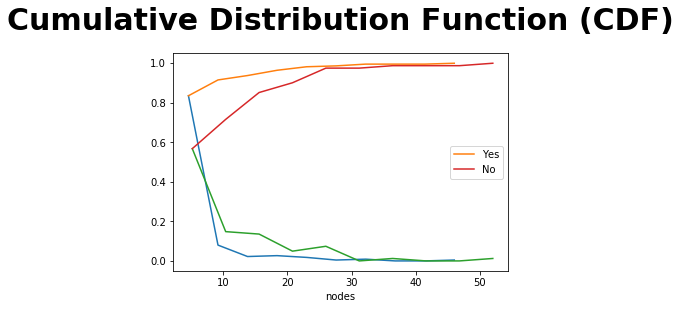

In [15]:
# For survived people
counts1, bin_edges1 = np.histogram(survived['nodes'], bins=10, density = True)
pdf1 = counts1/(sum(counts1))
print(pdf1);
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.xlabel('nodes')
plt.title('Cumulative Distribution Function (CDF)',fontweight='bold',fontsize='30',y=1.08)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'Yes')

print("***********************************************************")

#For not survived people
counts2, bin_edges2 = np.histogram(not_survived['nodes'], bins=10, density = True)
pdf2 = counts2/(sum(counts2))
print(pdf2);
print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2, label = 'No')
plt.xlabel('nodes')
plt.legend()
plt.show()

# Observation:
1. 82% of people have survived with node in range of 0-4.5
2. Nearly 100% of people will not survive when the node is greater than 40

# 6c. Box plot with whiskers

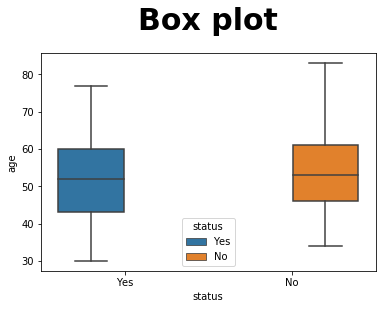

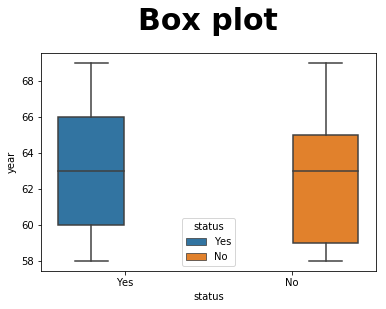

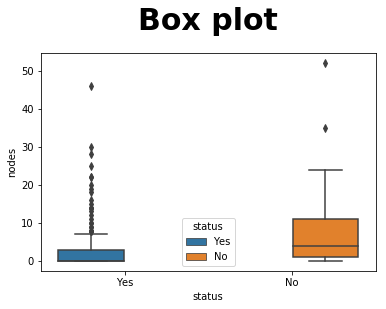

In [16]:
sns.boxplot(x='status',y='age',data=df,hue="status").set_title('Box plot',fontweight='bold',fontsize='30',y=1.08)
plt.show()
sns.boxplot(x='status',y='year',data=df,hue="status").set_title('Box plot',fontweight='bold',fontsize='30',y=1.08)
plt.show()
sns.boxplot(x='status',y='nodes',data=df,hue="status").set_title('Box plot',fontweight='bold',fontsize='30',y=1.08)
plt.show()

# Observation
1. Patients with 1 nodes or less than 1 node are likely to survive. 
2. Chances of survival reduces when the number of node increase.

# 6d. Violin Plot

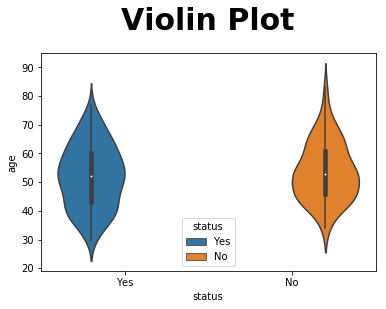

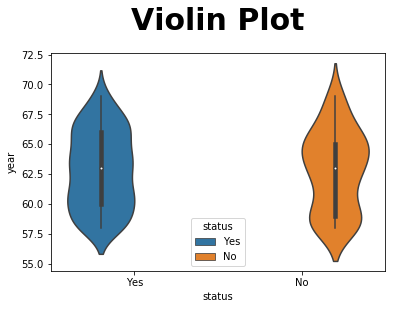

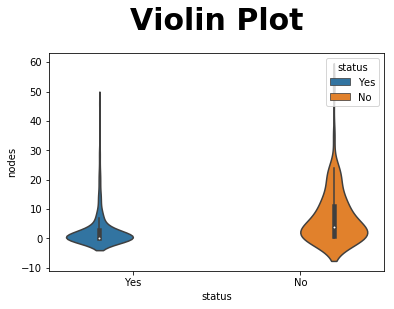

In [17]:
sns.violinplot(x="status",y="age",data = df,height = 10,hue="status").set_title("Violin Plot",fontweight='bold',fontsize='30',y=1.08)
plt.show()
sns.violinplot(x="status",y="year",data = df,height = 10,hue="status").set_title("Violin Plot",fontweight='bold',fontsize='30',y=1.08)
plt.show()
sns.violinplot(x="status",y="nodes",data = df,height = 10,hue="status").set_title("Violin Plot",fontweight='bold',fontsize='30',y=1.08)
plt.show()

# Observation
1. People who got operated in the year 1965 did not survive for more than 5 years comparatively.
2. Comparatively, more people survived more than 5 years when they have node less than 1 but there are people who were not survived as well. This means that people having no nodes can also not survive more than 5 years.
3. People at the age of 50 has higher chance of not surviving fo rmore than 5 years.

# 7. Bi-variate analysis

## 7a. Scatter plot

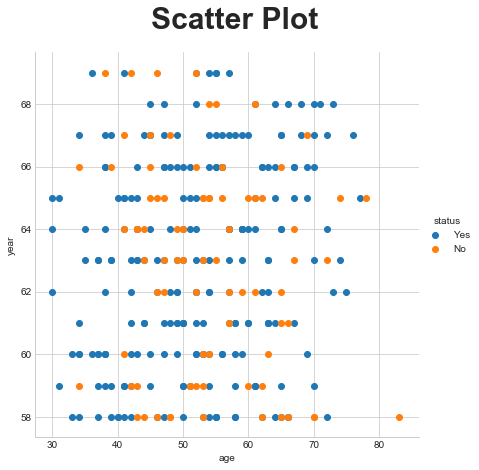

In [18]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "status" , size = 6)\
 .map(plt.scatter,"age","year")\
 .add_legend().fig.suptitle('Scatter Plot',fontweight ="bold",fontsize='30',y=1.08)
plt.show()

# 7b. Pair plot

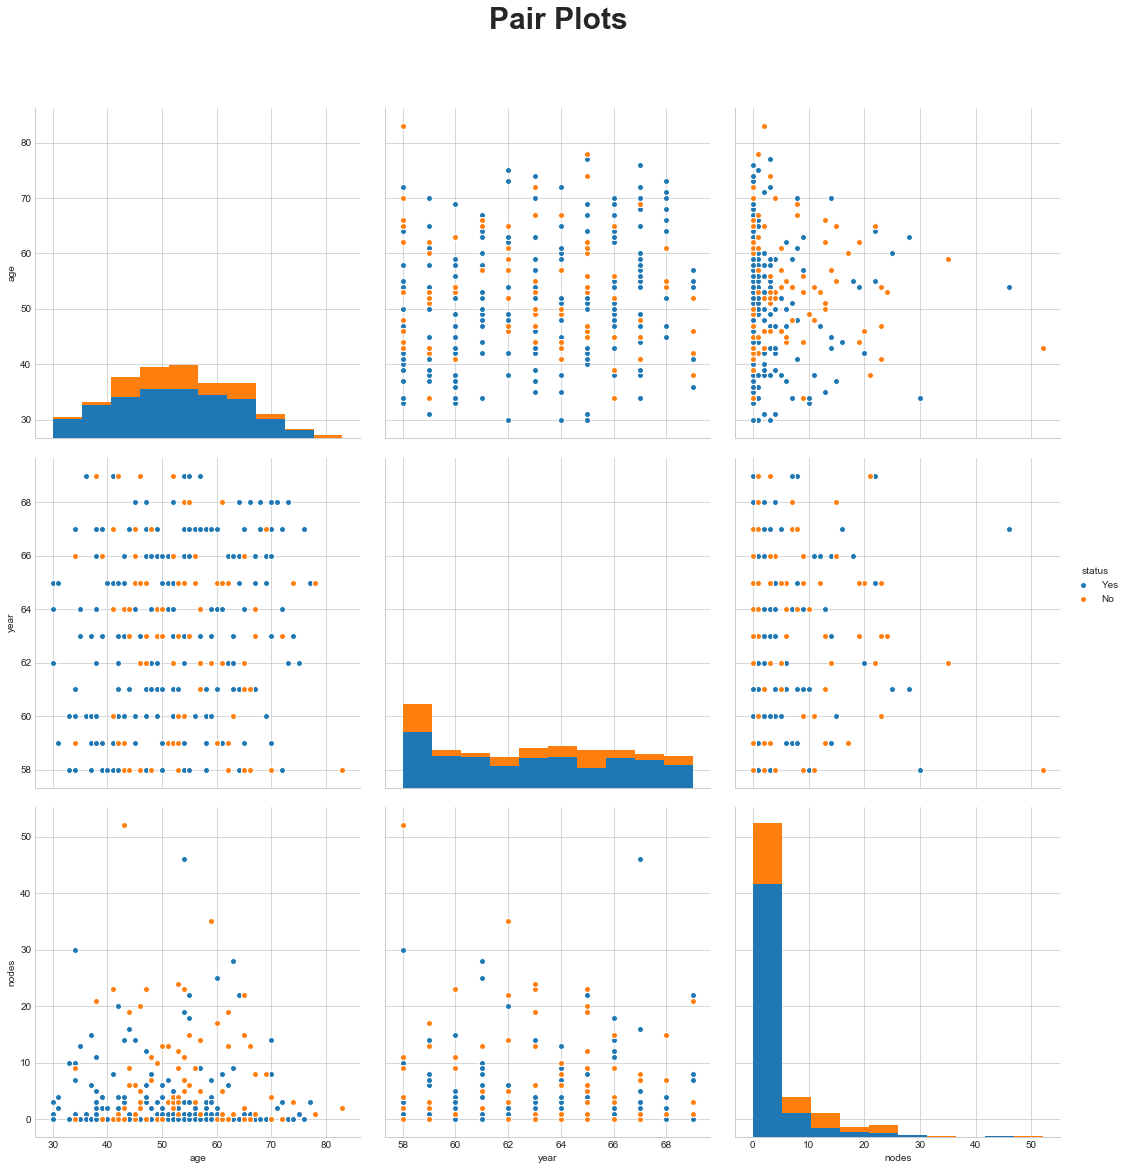

In [19]:
sns.set_style("whitegrid")
sns.pairplot(df, hue="status", size = 5).fig.suptitle('Pair Plots',fontweight='bold',fontsize='30',y=1.08)
plt.show()

# Observation
1. Amongst all the pair plots, age vs nodes can able to distinguish between survivors and non-survivors when compared with others. 

# 8. Multivariate Analysis
## 8a. Contour Plot

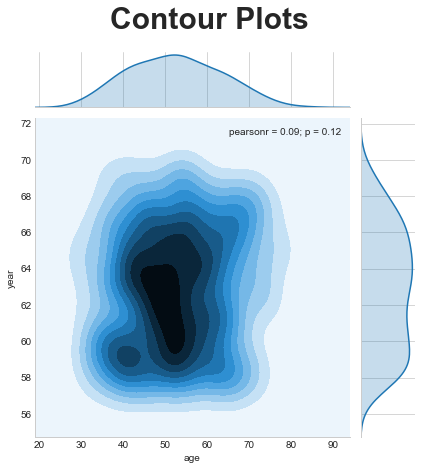

In [20]:
sns.jointplot(x = 'age', y = 'year', data = df, kind = "kde").fig.suptitle('Contour Plots',fontweight='bold',fontsize='30',y=1.08)
plt.show()

# Observation
1. People who got operated from 1960 to 1964 are at the age between 45 and 55

# Overall Conclusion:
1. Survival chance is inversely proportional to the number of nodes. The absence of nodes cannot always guarantee survival. [Violin plot {node vs status}]
2. People less than 35 years have more chance of survival but Patient’s age and operation year alone are not deciding factors for his/her survival.[PDF{age},Scatter plot{age vs year}]
3. Age vs nodes might able to distinguish between survivors and non-survivors when compared with others but not perfectly. [Pair plot {ave vs nodes}]
4. Since the data is imbalance, the objective of classifying the survival status of a new patient based on the given features is a difficult task.